In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [3]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B969838F48>],
      dtype=object)

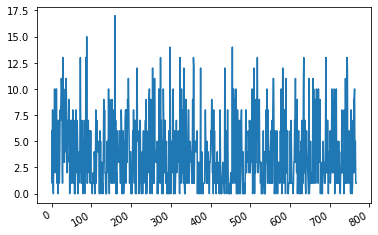

In [6]:
dataset['Pregnancies'].plot(kind='line',subplots=True)

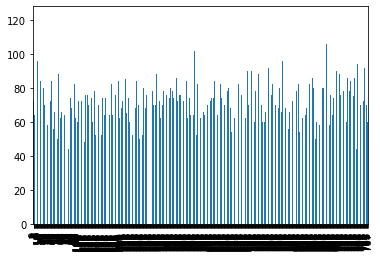

In [7]:
dataset['BloodPressure'].plot(kind='bar')

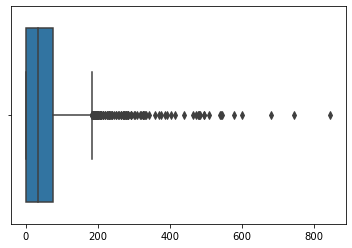

In [8]:
import seaborn as sns
sns.boxplot(dataset.iloc[:,1:-1])

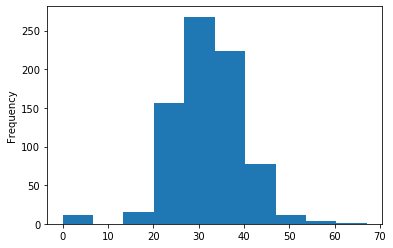

In [9]:
dataset['BMI'].plot(kind='hist')

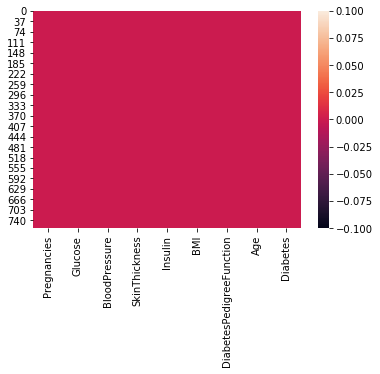

In [10]:
sns.heatmap(dataset.isnull())

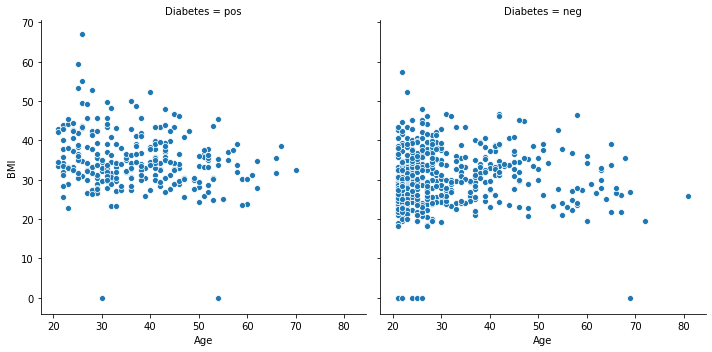

In [11]:
sns.relplot(x='Age',y='BMI',data=dataset,col='Diabetes')

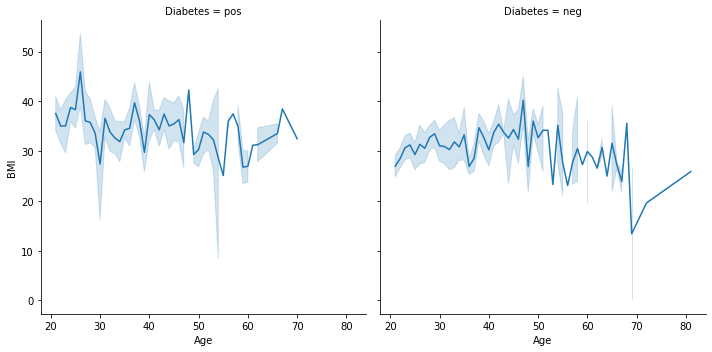

In [12]:
sns.relplot(x='Age',y='BMI',data=dataset,col='Diabetes',kind='line')

In [13]:
x=dataset.iloc[:,0:-1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [14]:
y=dataset.iloc[:,-1].values

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
y=le.fit_transform(y)

In [18]:
y[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
x=sc.fit_transform(x)

In [22]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model1=LogisticRegression()

In [28]:
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pred1=model1.predict(x_test)
pred1

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [30]:
pr1=le.inverse_transform(pred1)
pr1

array(['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg',
       'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos',
       'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg',
       'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg',
       'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg',

In [31]:
usr=[4,140,80,30,90,26.9,1.25,27]
usr=np.array([usr])
usr.shape

(1, 8)

In [32]:
usr=sc.fit_transform(usr)
le.inverse_transform(model1.predict(usr))

array(['neg'], dtype=object)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

In [34]:
accuracy_score(y_test,pred1)

0.7337662337662337

In [35]:
confusion_matrix(y_test,pred1)

array([[80, 11],
       [30, 33]], dtype=int64)

In [36]:
fpr,tpr,threshold=roc_curve(y_test,pred1) #fpr is false prediction,tpr is true prediction
roc_auc=auc(fpr,tpr)
roc_auc

0.7014652014652014

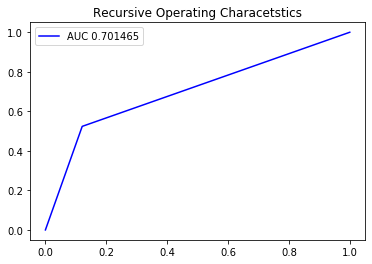

In [37]:
plt.title('Recursive Operating Characetstics')
plt.plot(fpr,tpr,'b',label='AUC %f'%roc_auc)
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import plot_confusion_matrix

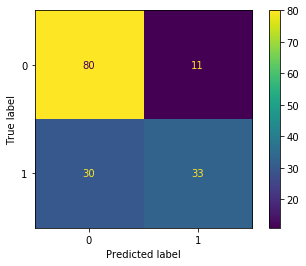

In [39]:
plot_confusion_matrix(model1,x_test,y_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
report=classification_report(y_test,pred1)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        91
           1       0.75      0.52      0.62        63

    accuracy                           0.73       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.74      0.73      0.72       154

